In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mcmc
import autograd
from autograd import numpy as np
from autograd.scipy import stats
import scipy.spatial
%load_ext mcmc
%mcmc notebook

In [2]:
noise_variance = 0.01
discretisation_points = np.linspace(-1,1,51)
locations = discretisation_points[::10]
data = locations ** 2 + np.random.normal(0, noise_variance, locations.shape)
def discretisation_to_location(discretisation):
    return discretisation[np.in1d(discretisation_points, locations)]

In [3]:
def potential(u):
    data_locations = discretisation_to_location(u)
    return -stats.multivariate_normal.logpdf(data_locations, data, noise_variance**2*np.eye(data_locations.shape[0]))

In [4]:
distance = scipy.spatial.distance.cdist(discretisation_points[:,None], discretisation_points[:,None])
ls = 0.8
covariance = np.exp(-distance / (2*ls**2))

In [16]:
proposal = mcmc.pcn.proposal(0.01, covariance)
samp, accept = mcmc.pCN(100000, proposal, potential, discretisation_points**2)

In [17]:
grad_phi = autograd.grad(potential)
mala_proposal = mcmc.pcn.InfinityMalaProposal(grad_phi, covariance, 1e-4)

In [18]:
samp_mala, accept = mcmc.pCN(100000, mala_proposal, potential, discretisation_points**2)

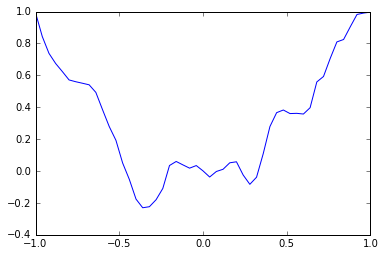

In [23]:
plt.plot(discretisation_points, samp_mala.mean(axis=0))

In [14]:
from pandas.tools.plotting import autocorrelation_plot

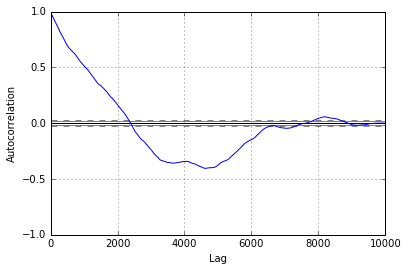

In [21]:
autocorrelation_plot(samp[::10, 1])

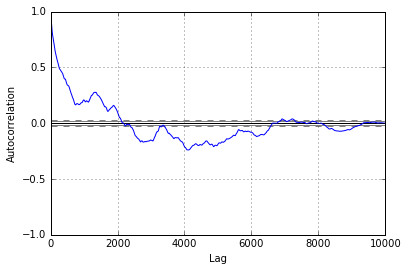

In [24]:
autocorrelation_plot(samp_mala[::10, 2])